The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



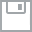
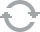
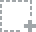
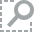
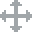
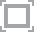
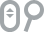
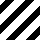
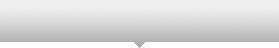
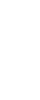
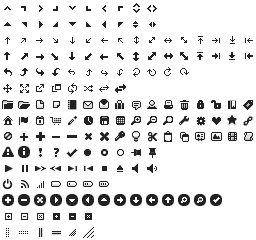
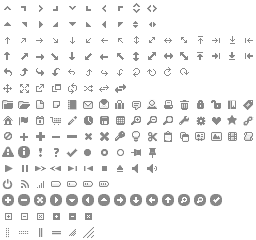
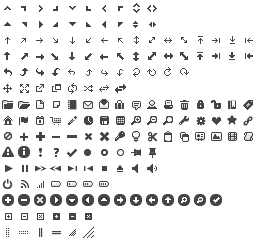
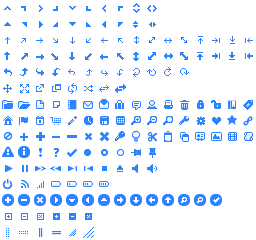
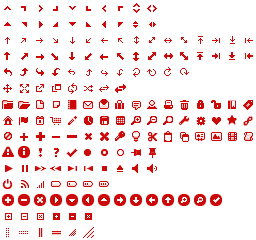
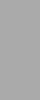
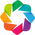
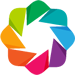

In [4]:
from __future__ import division
from utils import *
from functions import *
from cycler import cycler
import matplotlib as mpl
%matplotlib inline

%load_ext autoreload
%autoreload 2

today = datetime.date.today()
todayStr = '%04d%02d%02d' % (today.year, today.month, today.day)
# todayStr = '20151005'
DIRECTORY = os.path.expanduser("~/Dropbox/0000 - PhD/figures/"+todayStr+"/")
if not os.path.exists(DIRECTORY):
    os.makedirs(DIRECTORY)
    
from bokeh.io import output_notebook
output_notebook()

In [5]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [6]:
# Instantiate classes
cortex = Cortex()
trn = TRN()

In [74]:
# #-------------------------------
# # PARAMS SEARCH
# #-------------------------------
N = 500
G = 8.1
d1 = 10
d2 = 80000
d3 = 10
before = d1
after = d2+d3
S = 150
sigma = 60
WII = 1400
LTP = 0.01
LTD = 0.002
for S in np.arange(50,400,50):
    Parallel(n_jobs=8)(delayed(cortex.runSimulation)(N,0, G, S, d1, d2, d3, before, after, sigma, WII, LTP, LTD) for G in np.linspace(1,9,8))

In [75]:
# #-------------------------------
# # PLOT RESULTS
# #-------------------------------

res = []
for S in np.arange(50,400,50):
    data = Parallel(n_jobs=8)(delayed(cortex.readSimulation)(N, 0, G, S, d1, d2, d3, before, after, WII, LTP, LTD) for G in np.linspace(1,9,8))
    res.append(data)

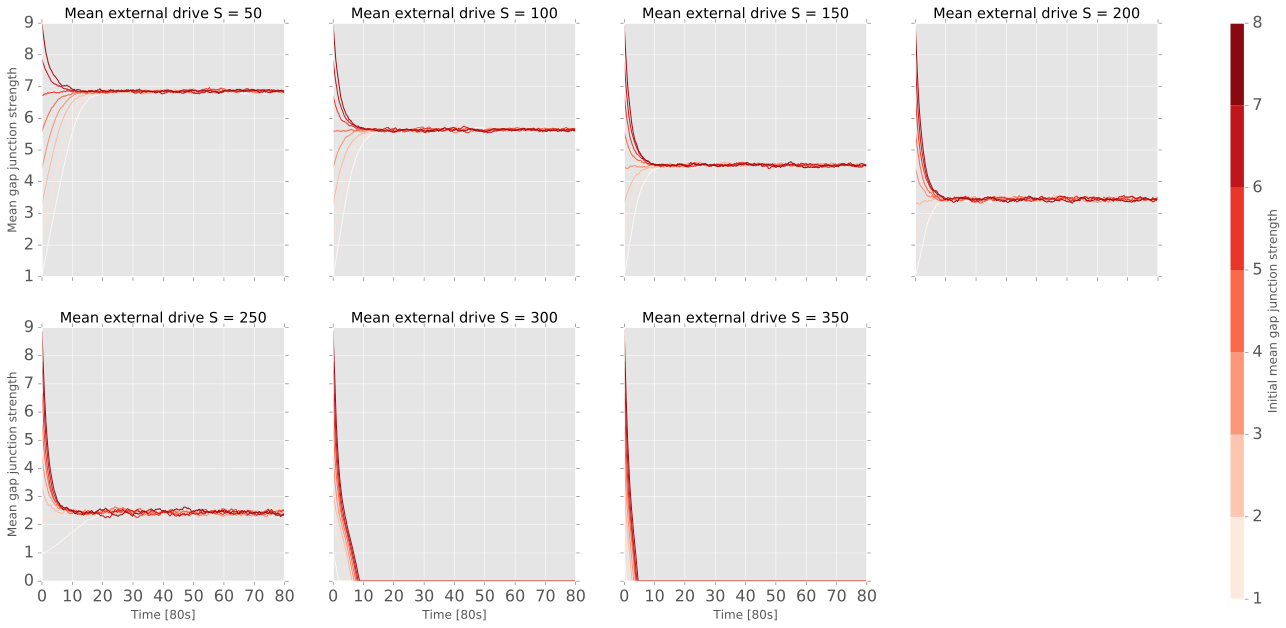

In [76]:
colormap = plt.cm.Reds

min, max = (1, 8)
step = 1

fig, axes = plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True, figsize=(20,10))

# Setting up a colormap that's a simple transtion
mymap = mpl.colors.LinearSegmentedColormap.from_list('mycolors',['blue','red'])
mymap = colormap

# Using contourf to provide my colorbar info, then clearing the figure
Z = [[0,0],[0,0]]
levels = range(min,max+step,step)
CS3 = plt.contourf(Z, levels, cmap=mymap)
plt.clf()


for k,S in enumerate(np.arange(50,400,50)):
    ax = fig.add_subplot(241+k)
    ax.set_prop_cycle(cycler('color',[colormap(i) for i in np.linspace(0, 0.9, len(res[0]))]))
    for i, exp in enumerate(res[k]):
        im = ax.plot(np.arange(0,(before+after)/1000, (before+after)/1000/len(exp[4][1:])), exp[4][1:], label = r'$\gamma_0 = %s$' %str(i+1))
        ax.set_xticklabels([])
        if k>3:
            ax.set_xticks([i for i in np.arange(0,90,10)])
            ax.set_xticklabels([i for i in np.arange(0,90,10)])
            ax.set_xlabel('Time [80s]')
        if k in [0,4]:
            ax.set_ylabel('Mean gap junction strength')
        else:
            ax.set_yticklabels([])
        ax.set_title('Mean external drive S = %d'%S)
#         ax.legend()

# cax,kw = mpl.colorbar.make_axes([ax for ax in axes.flat], aspect=50,pad = 9)

cbaxes = fig.add_axes([0.95, 0.1, 0.01, 0.8]) 
plt.colorbar(CS3, cax=cbaxes) # using the colorbar info I got from contourf
plt.ylabel('Initial mean gap junction strength')
# plt.tight_layout()
plt.savefig(DIRECTORY + 'plasticity-accross-different-params_LTP-%g_LTD-%g.pdf'%(LTP,LTD))

S:50 - G0:1 - Power:23.3901 - Freq:19.4449
S:50 - G0:2 - Power:23.6221 - Freq:19.4699
S:50 - G0:3 - Power:21.5956 - Freq:19.5199
S:50 - G0:4 - Power:25.1799 - Freq:19.4199
S:50 - G0:5 - Power:23.8814 - Freq:19.4449
S:50 - G0:6 - Power:21.5049 - Freq:19.3699
S:50 - G0:7 - Power:24.482 - Freq:19.4699
S:50 - G0:8 - Power:20.8469 - Freq:19.3949
S:100 - G0:1 - Power:21.9027 - Freq:24.7185
S:100 - G0:2 - Power:25.4612 - Freq:24.6435
S:100 - G0:3 - Power:21.4915 - Freq:24.7685
S:100 - G0:4 - Power:24.8727 - Freq:24.6435
S:100 - G0:5 - Power:24.7887 - Freq:24.6935
S:100 - G0:6 - Power:22.8539 - Freq:24.6435
S:100 - G0:7 - Power:24.085 - Freq:24.6685
S:100 - G0:8 - Power:23.2733 - Freq:24.6435
S:150 - G0:1 - Power:25.8719 - Freq:29.3423
S:150 - G0:2 - Power:25.5882 - Freq:29.3923
S:150 - G0:3 - Power:26.7937 - Freq:29.3673
S:150 - G0:4 - Power:24.6589 - Freq:29.3923
S:150 - G0:5 - Power:25.2276 - Freq:29.3923
S:150 - G0:6 - Power:23.333 - Freq:29.3423
S:150 - G0:7 - Power:22.9386 - Freq:29.3923

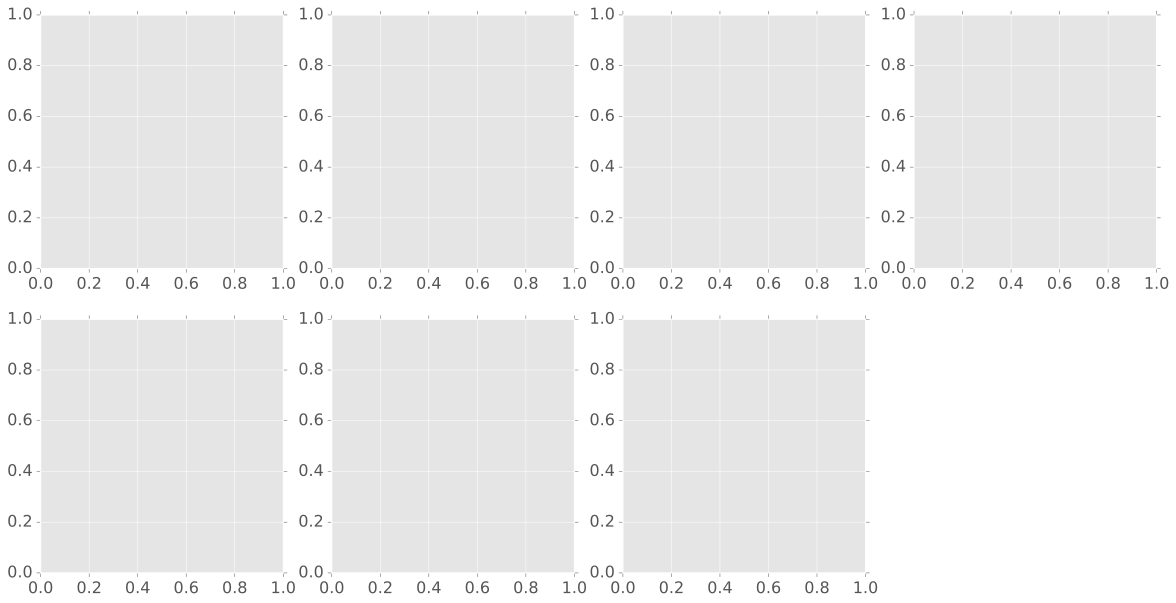

In [77]:
# #-------------------------------
# # PLOT FREQ AND POWER AT FIXED STATE
# #-------------------------------

colormap = plt.cm.Reds

min, max = (1, 8)
step = 1

fig, axes = plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True, figsize=(20,10))

# Setting up a colormap that's a simple transtion
mymap = mpl.colors.LinearSegmentedColormap.from_list('mycolors',['blue','red'])
mymap = colormap

# Using contourf to provide my colorbar info, then clearing the figure
Z = [[0,0],[0,0]]
levels = range(min,max+step,step)
CS3 = plt.contourf(Z, levels, cmap=mymap)
plt.clf()


for k,S in enumerate(np.arange(50,400,50)):
    ax = fig.add_subplot(241+k)
    ax.set_prop_cycle(cycler('color',[colormap(i) for i in np.linspace(0, 0.9, len(res[0]))]))
    for i, exp in enumerate(res[k]):
        ssp1 = exp[6][1:]
        P = fourier(ssp1)
        print('S:%d - G0:%d - Power:%g - Freq:%g'%(S,i+1,P[1],P[0]))
       

In [64]:
# #-------------------------------
# # PARAMS SEARCH
# #-------------------------------
N = 500
G = 5
d1 = 10
d2 = 80000
d3 = 10
before = d1
after = d2+d3
S = 150
sigma = 60
WII = 1400
LTP = 0.01
LTD = 0.001
Parallel(n_jobs=8)(delayed(cortex.runSimulation)(N,0, G, S, d1, d2, d3, before, after, sigma, WII, LTP, LTD) for S in np.arange(50,350,5))

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]